# **Introduction to Image Processing**

Mojdeh Rastgoo - Desire Sidibe

In [1]:
%matplotlib inline
%pprint off

from __future__ import print_function, division

import numpy as np
import matplotlib.pyplot as plt

from skimage import img_as_ubyte
from skimage.color import rgb2gray
from skimage import io 
from skimage.transform import rescale

from matplotlib import cm

Pretty printing has been turned OFF


## 5.1 Morphological operations 

**Q.1** Using morphological operations functions build in skimage [`morphology module`](http://scikit-image.org/docs/dev/api/skimage.morphology.html) and structuring element of [`disk`](http://scikit-image.org/docs/dev/api/skimage.morphology.html#skimage.morphology.disk) apply **erosion, dilation, opening and closing** morphological operations on `FindingContours.png` image, using disk ratio of $r \in [1, 10, 20]$

**Note** use io.imshow to show the image rather than plt.

** Q.1.1 Erosion**

Text(0.5,1,'Erosed image with disk of 20')

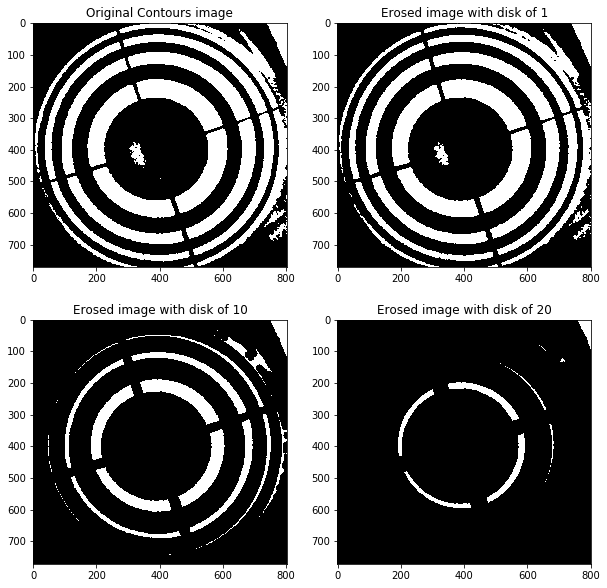

In [2]:
import skimage.morphology as morph
from skimage.morphology import disk

img_path = './images/'
img_name = 'FindingContours.png'
Contours = io.imread(img_path.__add__(img_name), as_grey=True)

fig, axes = plt.subplots(2,2,figsize=(10,10))
axes = axes.ravel()

axes[0].imshow(Contours,cmap=cm.gray)
axes[0].set_title('Original Contours image')

Contours_erosed = morph.erosion(Contours,disk(1))
axes[1].imshow(Contours_erosed,cmap=cm.gray)
axes[1].set_title('Erosed image with disk of 1')

Contours_er_10 = morph.erosion(Contours,disk(10))
axes[2].imshow(Contours_er_10,cmap=cm.gray)
axes[2].set_title('Erosed image with disk of 10')

Contours_er_20 = morph.erosion(Contours,disk(20))
axes[3].imshow(Contours_er_20,cmap=cm.gray)
axes[3].set_title('Erosed image with disk of 20')

** Q.1.2 Dilation **

Text(0.5,1,'Dilation applied with disk of 20')

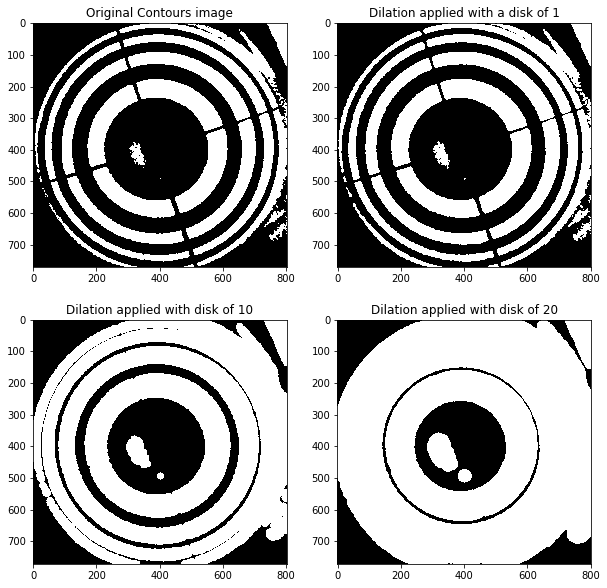

In [3]:
fig, axes = plt.subplots(2,2,figsize=(10,10))
axes = axes.ravel()

axes[0].imshow(Contours,cmap=cm.gray)
axes[0].set_title('Original Contours image')

Contours_di_1 = morph.dilation(Contours,disk(1))
axes[1].imshow(Contours_di_1,cmap=cm.gray)
axes[1].set_title('Dilation applied with a disk of 1')

Contours_di_10 = morph.dilation(Contours,disk(10))
axes[2].imshow(Contours_di_10,cmap=cm.gray)
axes[2].set_title('Dilation applied with disk of 10')

Contours_di_20 = morph.dilation(Contours,disk(20))
axes[3].imshow(Contours_di_20,cmap=cm.gray)
axes[3].set_title('Dilation applied with disk of 20')

** Q.1.3 Opening **

Text(0.5,1,'Opening applied with disk of 20')

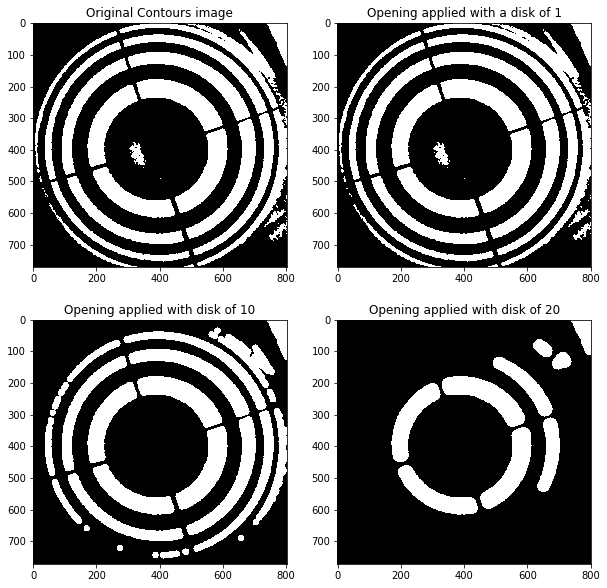

In [4]:
fig, axes = plt.subplots(2,2,figsize=(10,10))
axes = axes.ravel()

axes[0].imshow(Contours,cmap=cm.gray) #Opening applies first the erotion to the image and then the dilation
axes[0].set_title('Original Contours image')

Contours_op_1 = morph.opening(Contours,disk(1))
axes[1].imshow(Contours_op_1,cmap=cm.gray)
axes[1].set_title('Opening applied with a disk of 1')

Contours_op_10 = morph.opening(Contours,disk(10))
axes[2].imshow(Contours_op_10,cmap=cm.gray)
axes[2].set_title('Opening applied with disk of 10')

Contours_op_20 = morph.opening(Contours,disk(20))
axes[3].imshow(Contours_op_20,cmap=cm.gray)
axes[3].set_title('Opening applied with disk of 20')

** Q.1.4 Closing**

Text(0.5,1,'Closing applied with disk of 20')

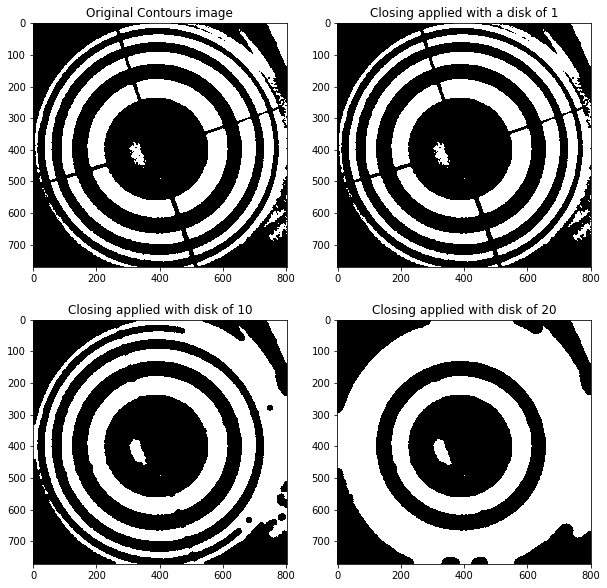

In [5]:
fig, axes = plt.subplots(2,2,figsize=(10,10))
axes = axes.ravel()

axes[0].imshow(Contours,cmap=cm.gray) #Closing applies first the dilation to the image and then the erosion
axes[0].set_title('Original Contours image')

Contours_cl_1 = morph.closing(Contours,disk(1))
axes[1].imshow(Contours_cl_1,cmap=cm.gray)
axes[1].set_title('Closing applied with a disk of 1')

Contours_cl_10 = morph.closing(Contours,disk(10))
axes[2].imshow(Contours_cl_10,cmap=cm.gray)
axes[2].set_title('Closing applied with disk of 10')

Contours_cl_20 = morph.closing(Contours,disk(20))
axes[3].imshow(Contours_cl_20,cmap=cm.gray)
axes[3].set_title('Closing applied with disk of 20')

** Q.2 ** Explain what is the difference between erosion, dilation, opening and closing ? 

The difference comes in the process of what they do in an image. The dilation tries to expand a connected set of 1s in a binary image. The erosion function shrinks the connected set of 1s. Now, the opening and closening is an application of both processes in an image but with changed order on which is applied first.
The closening uses first a dilation on the image and then combines the erotion process, on the contrary the opening uses first the erotion to the image and then applies the dilation to it.
Depending on what type of pre-processing you want to do to the image all of this functions can be used to do segmentation to it.

## 5.2 segmentation

### 5.2.1  Segmentation of toy example

In this exercise, you will have to automatically find how many type of coins are present on the picture `coins.jpg`.
Therefore: 

**1-** read the image as `ubyte` and display it. In order to speed-up the subsequent processes, divide the scale of the image by a factor of 4.

/home/wayo/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/home/wayo/anaconda3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


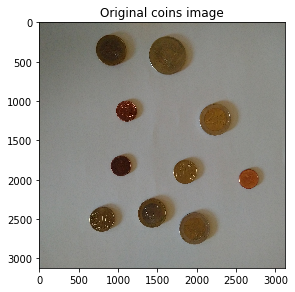

Text(0.5,1,'Rescaled image by a factor of 4')

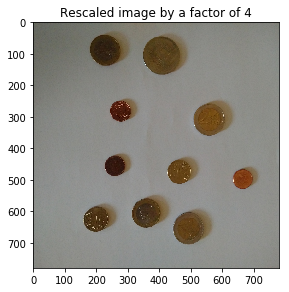

In [6]:
img_name_1 = 'coins.jpg'
coins = io.imread(img_path.__add__(img_name_1))

io.imshow(coins)
plt.title('Original coins image')

coins_rescale = img_as_ubyte(rescale(coins,1/4))
plt.show()
io.imshow(coins_rescale)
plt.title('Rescaled image by a factor of 4')


**2-** Threshold the image using a global Otsu's thresholding (check `skimage.filters`) after converting the image into gray scale. Display the thresholded image.

Text(0.5,1,"Otsu's threshold applied to the coins image")

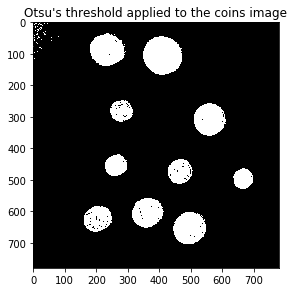

In [7]:
#Converting the image into gray scale
coins_re_gray = rgb2gray(coins_rescale)

import skimage.filters as filters

#Threshold to by applied to the image
otsu = filters.threshold_otsu(coins_re_gray)

#Otsu's Threshold will put to 1 all the pixels that are bigger than the threshold and 0 to those that are not
coins_otsu = coins_re_gray<=otsu

#dislpaying the image
io.imshow(coins_otsu)
plt.title('Otsu\'s threshold applied to the coins image')

**3-** Clean the  thresholded image using some morphological operations, i.e. erosion, dilation, opening, closing ...

Text(0.5,1,'Filtering the image by using dilation operation')

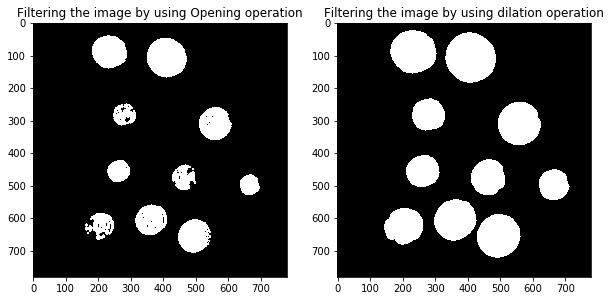

In [8]:
fig, axes = plt.subplots(1,2,figsize=(10,10))
axes = axes.ravel()

coins_clean = morph.opening(coins_otsu,disk(3))

axes[0].imshow(coins_clean,cmap=cm.gray) 
axes[0].set_title('Filtering the image by using Opening operation')

coins_clean_2 = morph.dilation(coins_clean,disk(16))

axes[1].imshow(coins_clean_2,cmap=cm.gray) 
axes[1].set_title('Filtering the image by using dilation operation')

**4-** Using the functions [`label`](http://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.label) and [`regionprops`](http://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.regionprops) determine, the radius of each region and determine the number of type of coins in the image.

1. Show the image with the different labels.
1. How many regions do you find?
1. Display the radius of each region. Draw the corresponding circle on the image using `circle_perimeter` from `skimage.draw`


The number of regions in the image are:  10
The radius of the region 1 is : 68
The radius of the region 2 is : 77
The radius of the region 3 is : 50
The radius of the region 4 is : 66
The radius of the region 5 is : 50
The radius of the region 6 is : 53
The radius of the region 7 is : 47
The radius of the region 8 is : 63
The radius of the region 9 is : 57
The radius of the region 10 is : 66


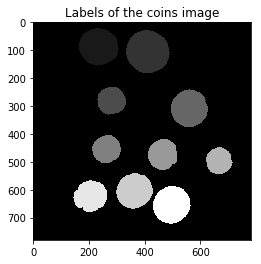

Text(0.5,1,'Image displaying the perimeters of each region')

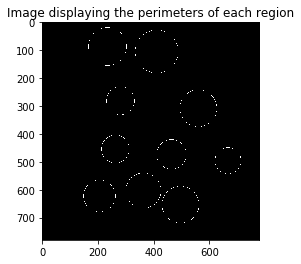

In [9]:
import skimage.measure as measure
import skimage.draw 

labels_image, nums = measure.label(coins_clean_2,return_num=True)
print('The number of regions in the image are: ',nums) #number of regions that the image has
plt.imshow(labels_image,cmap=cm.gray) #Labels is an image with regions already indentified
plt.title('Labels of the coins image')

region_prop = measure.regionprops(labels_image)
mask_regions = np.zeros(labels_image.shape)

for i in range(len(region_prop)):
    print('The radius of the region {} is :'.format(i+1), int(region_prop[i].equivalent_diameter/2))
    coordinates = skimage.draw.circle_perimeter(int(region_prop[i].centroid[0]),int(region_prop[i].centroid[1]),int(region_prop[i].equivalent_diameter/2))
    mask_regions[coordinates[0],coordinates[1]]=1

plt.show()
plt.imshow(mask_regions,cmap=cm.gray)
plt.title('Image displaying the perimeters of each region')

### 5.2.2 Segmentation of markers

**Q.3** Considering the techniques you used in the previous exercise, try to segment different objects in `objets4.jpg` image.

Using segmentation find the number of each object in the image. 

Considering that this is not as straight forward as the previous example, come up with your creative solutions and in case of failar explain the reasons and problems. 

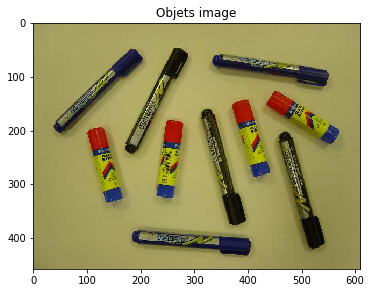

Text(0.5,1,'Gray objects image')

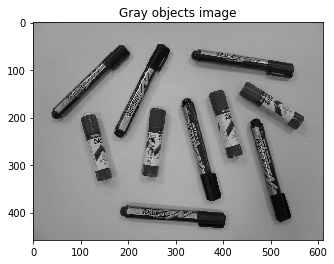

In [10]:
img_path_3='./images/'
img_name_3='objets4.jpg'
objects = io.imread(img_path_3.__add__(img_name_3))
io.imshow(objects)
plt.title('Objets image')

objects_gray = rgb2gray(objects)
plt.show()
plt.imshow(objects_gray,cmap=cm.gray)
plt.title('Gray objects image')

Text(0.5,1,'Otsu threshold applied to objects image')

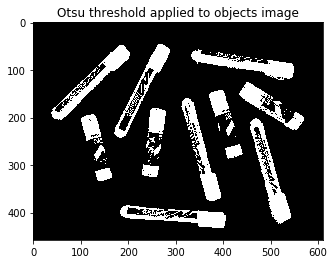

In [11]:
otsu_objects = filters.threshold_otsu(objects_gray)
objects_otsufil = objects_gray<=otsu_objects
plt.imshow(objects_otsufil,cmap=cm.gray)
plt.title('Otsu threshold applied to objects image')

Text(0.5,1,'Filtering the image by using dilation')

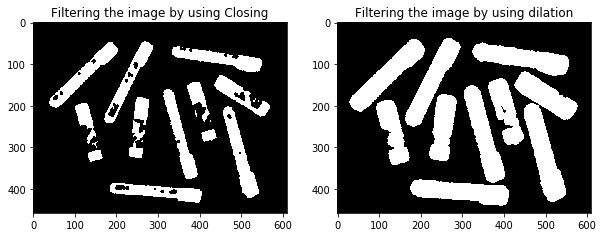

In [12]:
# In the image we can see how some markers on the image has label in their bodies, which make
# some spaces in the whole body of every marker.
# This makes the segmentation process a little bit more difficult because we will need to fill out this
# holes first to obtained the number of areas we want to recognize.

fig, axes = plt.subplots(1,2,figsize=(10,10))
axes = axes.ravel()

objects_clean = morph.closing(objects_otsufil,disk(3))

axes[0].imshow(objects_clean,cmap=cm.gray) 
axes[0].set_title('Filtering the image by using Closing')

objects_clean_2 = morph.dilation(objects_clean,disk(8))

axes[1].imshow(objects_clean_2,cmap=cm.gray) 
axes[1].set_title('Filtering the image by using dilation')

The number of regions in the image are:  10


Text(0.5,1,'Labels of the onjects image')

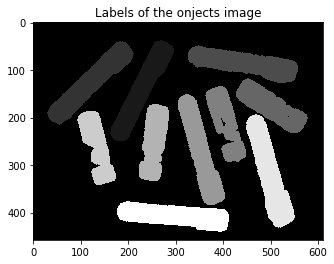

In [13]:
import skimage.draw

labels_image_ob, nums_ob = measure.label(objects_clean_2,return_num=True)
print('The number of regions in the image are: ',nums_ob) #number of regions that the image has
plt.imshow(labels_image_ob,cmap=cm.gray) #Labels is an image with regions already indentified
plt.title('Labels of the onjects image')

In [14]:
region_prop = measure.regionprops(labels_image_ob)
mask_regions = np.zeros(labels_image_ob.shape)
min_area = region_prop[1].area

#Displaying the areas of the objects
for i in range(0,nums_ob):
    print('The area of the region {} is: '.format(i+1),int(region_prop[i].area))
    # Obtaining the minimum area of all the regions to create a threshold for defining areas
    if region_prop[i].area<min_area:
        min_area = region_prop[i].area
print()
print('The minimum value of the areas is: ',min_area)


The area of the region 1 is:  9564
The area of the region 2 is:  10040
The area of the region 3 is:  10106
The area of the region 4 is:  7862
The area of the region 5 is:  6972
The area of the region 6 is:  9839
The area of the region 7 is:  7191
The area of the region 8 is:  6579
The area of the region 9 is:  10773
The area of the region 10 is:  9967

The minimum value of the areas is:  6579


In [15]:
# Recognizing the number of objects. If the area is between a range (defined by us) it will be a 
# glue. If not it will be a marker

threshold = min_area+1500 #Defining or threshold with the value of the min_area and a variance of 1500units
glue = 0 #number of glues counter
marker = 0 #number of markers counter

for i in range(nums_ob):
    if region_prop[i].area<threshold:
        glue = glue+1
    else:
        marker = marker+1
print ('There are {0} markers and {1} glues in the figure'.format(marker,glue))

There are 6 markers and 4 glues in the figure


/home/wayo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: numpy boolean subtract, the `-` operator, is deprecated, use the bitwise_xor, the `^` operator, or the logical_xor function instead.
  


Text(0.5,1,'Boundaries of every area')

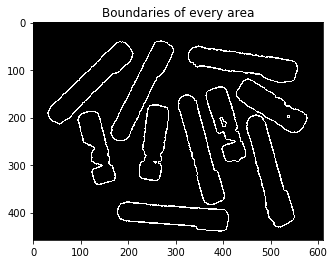

In [18]:
# Showing the contours of the 10 areas that were recognized by the label function
contour_obj = morph.erosion(objects_clean_2,disk(3))
boundaries = objects_clean_2-contour_obj

plt.imshow(boundaries,cmap=cm.gray) 
plt.title('Boundaries of every area')